# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [94]:
# import libraries here
import pandas as pd
import numpy as np

from scipy import stats # scientific python

import matplotlib.pyplot as plt
import seaborn as sns


# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`

In [3]:
# your answer here

employee = pd.read_csv('./Employee.csv')
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### What's the mean salary by department. 
##### Tip : There are 2 ways to do it - one way is with and the other way is without pivot tables. Do it both ways. 


In [5]:
# your answer here-1st way
employee.groupby('Department')['Salary'].mean()

Department
HR       45.00
IT       48.75
Sales    55.00
Name: Salary, dtype: float64

In [19]:
# your answer here-2nd way
pd.pivot_table(employee,
              values='Salary',
              index='Department',
              aggfunc='mean')

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title

In [34]:
# your answer here
pd.pivot_table(employee,
              values='Salary',
              index=['Department','Title'],
              aggfunc='mean'
              )

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [32]:
# your answer here
pd.pivot_table(employee,
              values=['Salary','Years'],
              index=['Title'],
              aggfunc='mean'
              )

,Salary,Years
Title,,
VP,70.000000,8.00
analyst,32.500000,2.25
associate,56.666667,4.00


#### We want to know the information about the mean salary and number of employees in each department and for each job title

In [70]:
# your answer here
pd.pivot_table(
            employee,
            values=['Salary', 'Name'],
            index=['Department', 'Title'], 
            aggfunc={'Salary':np.mean,'Name': 'count'},
              )

Name  Salary
Department Title                  
HR         VP            1    70.0
           analyst       2    32.5
IT         VP            1    70.0
           analyst       2    32.5
           associate     1    60.0
Sales      associate     2    55.0

#### We want to know for each department and for each job title the Salary's median,minimum,maximum and standard deviation. Comment your results

In [92]:
# your answer here
pd.pivot_table(
            employee,
            values=['Salary'],
            index=['Department', 'Title'], 
            aggfunc={'Salary':['mean', 'max', 'min', 'std']}
        )

# The are no std for  HR VP, IT - VP and IT associate due to there are only one value and when calculatin STD 

Salary                    
                        max  mean min       std
Department Title                               
HR         VP            70  70.0  70       NaN
           analyst       35  32.5  30  3.535534
IT         VP            70  70.0  70       NaN
           analyst       35  32.5  30  3.535534
           associate     60  60.0  60       NaN
Sales      associate     55  55.0  55  0.000000

#### Based on your comments, fill the missing values with an appropriate value

In [72]:
# your answer here
pd.pivot_table(
            employee,
            values=['Salary'],
            index=['Department', 'Title'], 
            aggfunc={'Salary':['mean', 'max', 'min', 'std']},
              fill_value=0
            
        )

Salary                    
                        max  mean min       std
Department Title                               
HR         VP            70  70.0  70  0.000000
           analyst       35  32.5  30  3.535534
IT         VP            70  70.0  70  0.000000
           analyst       35  32.5  30  3.535534
           associate     60  60.0  60  0.000000
Sales      associate     55  55.0  55  0.000000

#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [81]:
# your answer here
pd.pivot_table(
            employee,
            values=['Salary','Name'],
            index=['Department'], 
            aggfunc={'Salary': np.sum, 'Name': 'count'},
        )

,Name,Salary
Department,,
HR,3,135
IT,4,195
Sales,2,110


#### For each Department and Title, we want to know the the total years of work experience and the mean salary

In [85]:
# your answer here
employee.head(2)
pd.pivot_table(
            employee,
            values=['Years','Salary'],
            index=['Department', 'Title'], 
            aggfunc={'Years': np.sum, 'Salary': np.mean}
        )

Salary  Years
Department Title                   
HR         VP           70.0      8
           analyst      32.5      6
IT         VP           70.0      8
           analyst      32.5      3
           associate    60.0      7
Sales      associate    55.0      5

#### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table

#### * Hint: Write a custom function*

In [119]:
# your answer here--Your custom function here

    

In [128]:
# your answer here
employee.head(2)
all_employees = pd.pivot_table(
            employee,
            values=['Salary'],
            index=['Department'], 
            aggfunc={'Salary': is_max }
        )


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`

In [87]:
# your answer here
fitbit = pd.read_csv('./Fitbit.csv')

#### Explore you dataset in terms of data types and descriptive statistics
#### *Hint: Use Pandas functions from previous lectures*

In [90]:
# your answer here
fitbit.info()

fitbit.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    367 non-null    object 
 1   Calorie burned          367 non-null    int64  
 2   Steps                   367 non-null    int64  
 3   Distance                367 non-null    float64
 4   Floors                  367 non-null    int64  
 5   Minutes Sedentary       367 non-null    float64
 6   Minutes Lightly Active  367 non-null    int64  
 7   Minutes Fairly Active   367 non-null    int64  
 8   Minutes Very Active     367 non-null    int64  
 9   Activity Calories       367 non-null    int64  
 10  MinutesOfSleep          367 non-null    int64  
 11  MinutesOfBeingAwake     367 non-null    int64  
 12  NumberOfAwakings        367 non-null    int64  
 13  LengthOfRestInMinutes   367 non-null    int64  
dtypes: float64(2), int64(11), object(1)
memory

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491


In [96]:
# your answer here
fitbit.describe()
fitbit.corr()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
Calorie burned,1.000000,0.255305,0.292790,0.130757,0.125353,0.209540,0.188256,0.197881,-0.130758,0.011485,0.041999,0.030490,0.017460
Steps,0.255305,1.000000,0.779678,0.306511,0.076906,0.393010,0.303244,0.571452,-0.160568,0.130986,0.124846,0.106591,0.133405
Distance,0.292790,0.779678,1.000000,0.382940,0.160632,0.455272,0.348113,0.759310,-0.246853,0.129442,0.130447,0.091095,0.134550
Floors,0.130757,0.306511,0.382940,1.000000,0.057812,-0.085992,0.278408,0.399503,-0.155532,0.069464,0.064587,0.043459,0.075864
Minutes Sedentary,0.125353,0.076906,0.160632,0.057812,1.000000,0.217021,0.084137,0.105963,-0.161446,0.204242,0.200589,0.178387,0.208539
Minutes Lightly Active,0.209540,0.393010,0.455272,-0.085992,0.217021,1.000000,0.014288,-0.034425,-0.219892,0.105048,0.096107,0.087150,0.105406
Minutes Fairly Active,0.188256,0.303244,0.348113,0.278408,0.084137,0.014288,1.000000,0.337839,-0.204562,0.114950,0.104303,0.100498,0.123034
Minutes Very Active,0.197881,0.571452,0.759310,0.399503,0.105963,-0.034425,0.337839,1.000000,-0.187309,0.108018,0.116559,0.099859,0.115641
Activity Calories,-0.130758,-0.160568,-0.246853,-0.155532,-0.161446,-0.219892,-0.204562,-0.187309,1.000000,-0.005804,0.010859,0.022757,-0.004992
MinutesOfSleep,0.011485,0.130986,0.129442,0.069464,0.204242,0.105048,0.114950,0.108018,-0.005804,1.000000,0.779595,0.780512,0.997184


#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [100]:
# your answer here
stats.pearsonr(fitbit['Minutes Very Active'], fitbit['Steps'])

(0.5714518481062598, 3.3572824994545226e-33)

#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

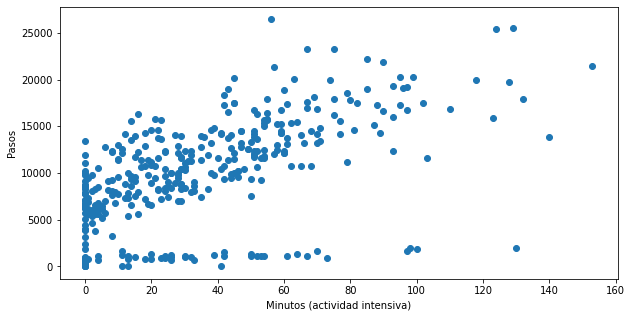

In [121]:
# your answer here

x = fitbit['Minutes Very Active']
y = fitbit['Steps']


plt.figure(figsize=(10, 5)) # figsize=(Ancho, Altura)
plt.scatter(x, y)
plt.xlabel('Minutos (actividad intensiva)')
plt.ylabel('Pasos');

#### What can you say about Minute Very Active and Steps? Write a comment below

# your comment here

La correlación para estas columnas es de 0.5714518481062598 por lo que representa una correlación moderada

#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [123]:
# your answer here
stats.pearsonr(fitbit['Minutes Sedentary'], fitbit['Steps'])

(0.07690608062990097, 0.14143690593737177)

#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

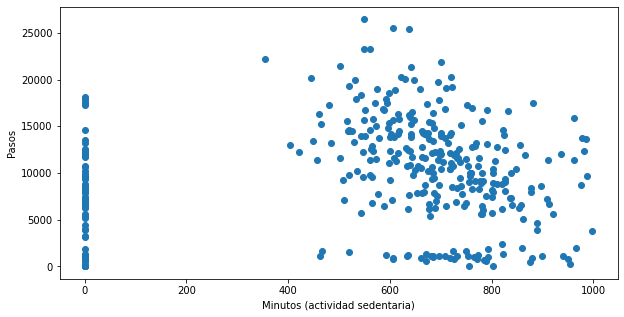

In [124]:
# your answer here

x = fitbit['Minutes Sedentary']
y = fitbit['Steps']


plt.figure(figsize=(10, 5)) # figsize=(Ancho, Altura)
plt.scatter(x, y)
plt.xlabel('Minutos (actividad sedentaria)')
plt.ylabel('Pasos');

# Your comment here
La correlación para estas columnas es de 0.07690608062990097 por lo que representa una correlación baja

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [125]:
# your answer here
stats.pearsonr(fitbit['MinutesOfSleep'], fitbit['Steps'])

(0.13098565950836386, 0.012018728392520099)

#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

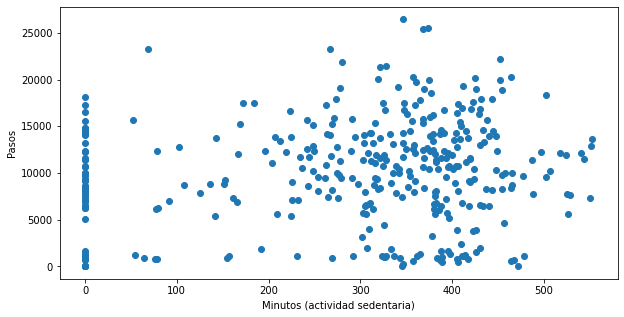

In [127]:
# your answer here

x = fitbit['MinutesOfSleep']
y = fitbit['Steps']


plt.figure(figsize=(10, 5)) # figsize=(Ancho, Altura)
plt.scatter(x, y)
plt.xlabel('Minutos (de sueño)')
plt.ylabel('Pasos');
#La correlación para estas columnas es de 0.13098565950836386 por lo que representa una correlación baja

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [135]:
# your answer here
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']
cor_fit=fitbit[column]
cor_fit=cor_fit.corr()

In [136]:
#Print cor_fit
cor_fit 

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [139]:
# your answer here
cor_fit['Steps'].sort_values(ascending=False)

Steps                  1.000000
Minutes Very Active    0.571452
Floors                 0.306511
Calorie burned         0.255305
MinutesOfSleep         0.130986
Minutes Sedentary      0.076906
Name: Steps, dtype: float64

# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`

In [140]:
# your answer here
time_grades = pd.read_csv('./Time_Grades.csv')

In [141]:
#Print time_grades
time_grades

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9
5,Eva,5,3
6,Carlos,12,7
7,Pedro,6,5
8,Ana,18,9
9,Gervasio,7,3


#### Show visually the frequency distribution of the time_grades dataset.

In [30]:
# your answer here


#### Is there a correaltion between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [31]:
# your answer here-Pearson 

In [32]:
## your answer here-Spearman

#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

In [33]:
# your answer here

In [34]:
#your comment here

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

In [35]:
#your comment here